<a href="https://colab.research.google.com/github/AmoghNamuduri/NAISS-Spring-2025-MLB-project-1-data-preprocessing-and-whitebox-model-training/blob/main/FinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
! pip install pandas
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
from google.colab import drive
drive.mount('/content/drive')
file = "/content/drive/My Drive/Colab Notebooks/corrupted_titanic_data.csv"
df = pd.read_csv(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df_cleaned = df.dropna()

In [87]:
drop_features = [
    "class", "who", "adult_male", "deck", "embark_town", "alive", "alone", "pclass_redundant"
]
df_cleaned_dropped = df_cleaned.drop(columns=drop_features, errors ="ignore")
df_cleaned_dropped.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,fare_age_combination
3,1,1,female,420.0,1,0,53.284868,S,22379.644511
6,0,1,male,54.0,0,0,51.314334,S,2770.974017
21,1,2,male,34.0,0,0,13.553364,s,460.814361
27,0,1,male,19.0,3,2,263.176986,s,5000.362740
88,1,1,FEMALE,23.0,3,2,262.789833,C,6044.166161


In [88]:
df_cleaned_dropped['age'] = df_cleaned_dropped['age'].fillna(df_cleaned_dropped['age'].median())
df_cleaned_dropped['embarked'] = df_cleaned_dropped['embarked'].fillna(df_cleaned_dropped['embarked'].mode())
df_cleaned_dropped['fare'] = df_cleaned_dropped['fare'].fillna(df_cleaned_dropped['fare'].median())
print(df_cleaned_dropped.head())


    survived  pclass     sex    age  sibsp  parch        fare embarked  \
3          1       1  female  420.0      1      0   53.284868        S   
6          0       1    male   54.0      0      0   51.314334        S   
21         1       2    male   34.0      0      0   13.553364        s   
27         0       1    male   19.0      3      2  263.176986        s   
88         1       1  FEMALE   23.0      3      2  262.789833        C   

    fare_age_combination  
3           22379.644511  
6            2770.974017  
21            460.814361  
27           5000.362740  
88           6044.166161  


In [89]:
df_cleaned_dropped['sex'] = df_cleaned_dropped['sex'].astype(str).str.lower()
df_cleaned_dropped['sex'] = df_cleaned_dropped['sex'].fillna(df_cleaned_dropped['sex'].mode()[0])
df_cleaned_dropped['sex'] = df_cleaned_dropped['sex'].map({'male': 0, 'female': 1})

df_cleaned_dropped['embarked'] = df_cleaned_dropped['embarked'].astype(str).str.lower()
df_cleaned_dropped['embarked'] = df_cleaned_dropped['embarked'].fillna(df_cleaned_dropped['embarked'].mode()[0])

df_cleaned_dropped['embarked'] = df_cleaned_dropped['embarked'].map({'c': 0, 'q': 1, 's': 2})
print(df_cleaned_dropped.head())


    survived  pclass  sex    age  sibsp  parch        fare  embarked  \
3          1       1    1  420.0      1      0   53.284868         2   
6          0       1    0   54.0      0      0   51.314334         2   
21         1       2    0   34.0      0      0   13.553364         2   
27         0       1    0   19.0      3      2  263.176986         2   
88         1       1    1   23.0      3      2  262.789833         0   

    fare_age_combination  
3           22379.644511  
6            2770.974017  
21            460.814361  
27           5000.362740  
88           6044.166161  


Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.88      0.83      0.86        18

    accuracy                           0.79        24
   macro avg       0.73      0.75      0.74        24
weighted avg       0.80      0.79      0.80        24


Confusion Matrix:
[[ 4  2]
 [ 3 15]]


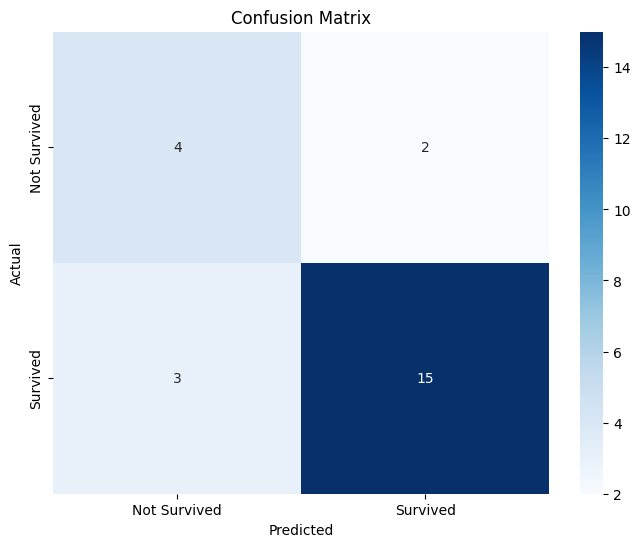

In [90]:
X = df_cleaned_dropped.drop(columns=['survived'])
y = df_cleaned_dropped['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()